Loading libraries

In [1]:
#################################################################
#MultilayerPerceptron with keras
#Author: Edwyn Javier Aldana
################################################################
#Load libraries
#######################################################################################
#                           TensorFlow and tf.keras
#######################################################################################
import tensorflow as tf
from tensorflow import keras
#######################################################################################
#                              Other libraries
#######################################################################################
import numpy as np
import matplotlib.pyplot as plt

Getting dataset, in this case, we use an standard dataset from NIST

In [2]:
#Load dataset
#######################################################################################
#                                     Get data images
#######################################################################################
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Exploring the dataset: We show a sample of training dataset and present some properties of traning and test dataset.

(60000, 28, 28)
(10000, 28, 28)


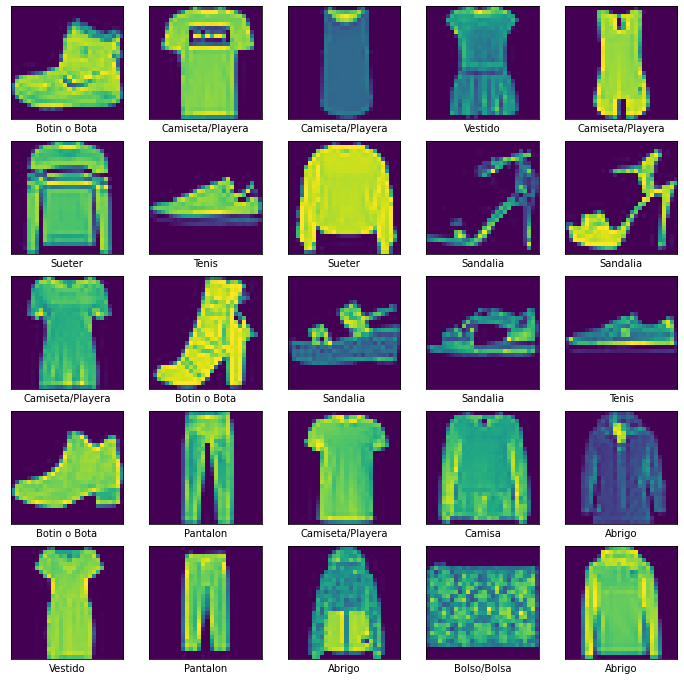

In [3]:
#Explore data images
#Mapping the label number to the following text labels
class_names = ['Camiseta/Playera', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolso/Bolsa', 'Botin o Bota']
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
#Datasets cardinality
print(train_images.shape) #60000 images with size of 28x28 pixel
print(test_images.shape) #10000 images with size of 28x28 pixel


Pre-processing dataset

In [6]:
#Scaling  images between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images[1].shape

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

Building a neural network

In [11]:
#Define the network architecture: 1) Input, Hidden and Output.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Input Layer
    keras.layers.Dense(128, activation=tf.nn.relu), #Hidden Layer
    keras.layers.Dense(10, activation=tf.nn.softmax) #Output Layer
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Training process

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4982 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3801 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3393 - accuracy: 0.8748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3129 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8899


Testing process

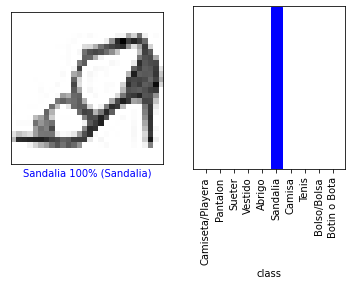

In [17]:
predictions = model.predict(test_images)
id_image=82 #Change the number of image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(id_image, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(id_image, class_names,predictions,  test_labels)



Function to display predictions

In [14]:
#Utilitary functions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


def plot_value_array(i, labels, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks(labels)
    plt.xticks(np.arange(10), labels, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xlabel('class', fontsize=10)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

